## **LetsGrowMore #Dec2021**

Name : Asmita Mohite

**Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM**

Level : Beginner

Environment : Google colab

Importing essential libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [31]:
sd = pd.read_csv('/content/stock dataset.csv')

Displaying first 15 entries in the dataset

In [32]:
sd.head(15)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


Displaying last 10 entries of the dataset

In [33]:
sd.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


The number of columns and rows :

In [34]:
sd.shape

(2035, 8)

In [35]:
sd.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [36]:
sd['Date'] = pd.to_datetime(sd['Date'])

In [37]:
sdclose = sd['Close']

In [38]:
sdclose

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Sorting the dataset according to date

In [39]:
sd=sd.sort_values('Date')

In [40]:
sd.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [41]:
sd.reset_index(inplace=True)

Visiualizing the data

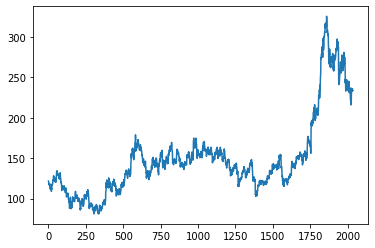

In [42]:
plt.plot(sd['Close'])

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
sdclose = scaler.fit_transform(np.array(sdclose).reshape(-1,1))

In [45]:
sdclose

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Training the Dataset

In [46]:
training_size = int(len(sdclose)*0.80)
test_size = len(sdclose) - training_size
train, test = sdclose[0: training_size,:], sdclose[training_size : len(sdclose),:1]

In [47]:
# converting the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [49]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM MODEL**

In [50]:
#importing essential libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
22/22 [==============================] - 10s 245ms/step - loss: 0.0249 - val_loss: 0.0074
Epoch 2/60
22/22 [==============================] - 4s 188ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 3/60
22/22 [==============================] - 4s 185ms/step - loss: 0.0017 - val_loss: 9.2296e-04
Epoch 4/60
22/22 [==============================] - 4s 187ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/60
22/22 [==============================] - 4s 191ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 6/60
22/22 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/60
22/22 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/60
22/22 [==============================] - 4s 189ms/step - loss: 0.0014 - val_loss: 8.2890e-04
Epoch 9/60
22/22 [==============================] - 4s 187ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/60
22/22 [==============================] - 4s 186ms/step - loss: 0.0012 - val_los

Prediciting the values

In [53]:
predict_values = model.predict(X_test)

In [55]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predict_values)

In [56]:
inv_predictions

array([[ 91.93885 ],
       [ 91.698074],
       [ 90.99247 ],
       [ 89.888985],
       [ 88.83111 ],
       [ 88.125084],
       [ 87.960945],
       [ 88.20872 ],
       [ 88.73722 ],
       [ 89.55897 ],
       [ 90.3175  ],
       [ 90.89182 ],
       [ 91.16954 ],
       [ 91.81084 ],
       [ 92.73098 ],
       [ 93.56427 ],
       [ 94.138596],
       [ 94.6337  ],
       [ 95.003494],
       [ 95.150475],
       [ 95.10042 ],
       [ 95.16324 ],
       [ 95.496635],
       [ 95.991936],
       [ 96.488815],
       [ 96.61985 ],
       [ 96.52974 ],
       [ 96.43448 ],
       [ 96.38149 ],
       [ 95.96093 ],
       [ 95.55312 ],
       [ 95.1962  ],
       [ 95.01992 ],
       [ 94.860466],
       [ 94.3919  ],
       [ 93.80842 ],
       [ 93.94231 ],
       [ 95.04584 ],
       [ 97.13038 ],
       [ 99.70129 ],
       [102.58102 ],
       [104.81317 ],
       [106.513756],
       [107.66923 ],
       [108.884544],
       [109.675705],
       [109.5801  ],
       [109.1

In [57]:
import math
from sklearn.metrics import mean_squared_error

In [59]:
mse = math.sqrt(mean_squared_error(y_test, predict_values))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.016468353135790304
